# imports and setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('regression_w_l_c.csv')

# preprocessing

In [108]:
import pandas as pd
import numpy as np

# Load your CSV
df = pd.read_csv("regression_w_l_c.csv")

# Minimum car weights by year
min_weights = {
    2018: 734,
    2019: 743,
    2020: 746,
    2021: 752,
    2022: 795,
    2023: 798,
    2024: 798
}

# Constants
max_fuel = 110
laps_total = 78

# Cache starting fuel + burn rate per (Year, DriverNumber)
fuel_cache = {}

def compute_weight(row):
    year = row['Year']
    driver = row['DriverNumber']
    lap = row['LapNumber']
    base_weight = min_weights[year]

    key = (year, driver)
    if key not in fuel_cache:
        initial_fuel = np.random.uniform(100, 110)
        final_fuel = np.random.uniform(1, 2)
        burn_per_lap = (initial_fuel - final_fuel) / (laps_total - 1)
        fuel_cache[key] = (initial_fuel, burn_per_lap)
    else:
        initial_fuel, burn_per_lap = fuel_cache[key]

    current_fuel = initial_fuel - (lap - 1) * burn_per_lap
    return base_weight + current_fuel

# Apply it
df['Weight'] = df.apply(compute_weight, axis=1)

# Save or inspect
df.to_csv("regression_w_l_c_with_weight.csv", index=False)
print("—Weight column added successfully.")


Weight column added successfully.


In [95]:
df = pd.read_csv("regression_w_l_c_with_weight.csv")

In [96]:
df

,LapNumber,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Rainfall,Year,DriverNumber,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Weight
0,1.0,25.70,51.0,1015.65,33.75,193.0,0.70,1.0,2018,10,...,Toro Rosso,0 days 00:06:47.319000,NaN,2,10.0,False,NaN,False,False,838.471950
1,2.0,26.00,50.7,1015.60,33.90,181.0,0.60,1.0,2018,10,...,Toro Rosso,0 days 00:08:19.100000,NaN,21,10.0,False,NaN,False,True,837.135114
2,3.0,26.00,50.7,1015.60,33.90,181.0,0.60,1.0,2018,10,...,Toro Rosso,0 days 00:09:39.719000,NaN,1,10.0,False,NaN,False,True,835.798278
3,4.0,26.10,50.0,1015.60,33.90,283.0,1.00,1.0,2018,10,...,Toro Rosso,0 days 00:10:59.531000,NaN,1,10.0,False,NaN,False,True,834.461442
4,5.0,26.60,48.6,1015.60,33.60,232.0,1.65,2.0,2018,10,...,Toro Rosso,0 days 00:12:19.093000,NaN,1,10.0,False,NaN,False,True,833.124606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,72.0,21.60,61.5,1018.40,40.50,211.5,0.70,0.0,2024,24,...,Kick Sauber,0 days 03:12:48.585000,NaN,1,16.0,False,NaN,False,True,807.296677
8307,73.0,21.70,61.0,1018.40,40.80,293.0,1.10,0.0,2024,24,...,Kick Sauber,0 days 03:14:09.170000,NaN,1,16.0,False,NaN,False,True,805.967166
8308,74.0,21.70,61.0,1018.40,40.80,214.0,0.70,0.0,2024,24,...,Kick Sauber,0 days 03:15:24.403000,NaN,1,16.0,False,NaN,False,True,804.637655
8309,75.0,21.70,61.0,1018.40,40.60,353.0,0.60,0.0,2024,24,...,Kick Sauber,0 days 03:16:44.876000,NaN,1,16.0,False,NaN,False,True,803.308144


In [42]:
df.DRS.describe()

count    8311.000000
mean        3.122970
std         6.551769
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        29.000000
Name: DRS, dtype: float64

In [97]:
df.columns

Index(['LapNumber', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp',
       'WindDirection', 'WindSpeed', 'Rainfall', 'Year', 'DriverNumber', 'RPM',
       'nGear', 'Throttle', 'Brake', 'DRS', 'Time', 'Driver', 'LapTime',
       'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted',
       'DeletedReason', 'FastF1Generated', 'IsAccurate', 'Weight'],
      dtype='object')

In [98]:
df.drop(['AirTemp', 'Humidity', 'Pressure',
       'WindDirection', 'WindSpeed', 'Rainfall', 'Time', 'Driver', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'Team', 'LapStartTime', 'LapStartDate', 'Position', 'Deleted',
       'DeletedReason', 'FastF1Generated', 'IsAccurate'], axis=1, inplace=True)

In [99]:
df

,LapNumber,TrackTemp,Year,DriverNumber,RPM,nGear,Throttle,Brake,DRS,LapTime,Stint,PitOutTime,PitInTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Weight
0,1.0,33.75,2018,10,9531.494048,3.413690,46.101190,99,0,0 days 00:01:31.614000,NaN,NaN,NaN,False,NaN,NaN,True,2,838.471950
1,2.0,33.90,2018,10,9394.374251,3.592814,47.080838,93,16,0 days 00:01:20.619000,1.0,NaN,NaN,True,HYPERSOFT,6.0,False,21,837.135114
2,3.0,33.90,2018,10,9429.505952,3.583333,48.086310,89,24,0 days 00:01:19.812000,1.0,NaN,NaN,True,HYPERSOFT,7.0,False,1,835.798278
3,4.0,33.90,2018,10,9437.838906,3.589666,47.723404,85,22,0 days 00:01:19.562000,1.0,NaN,NaN,True,HYPERSOFT,8.0,False,1,834.461442
4,5.0,33.60,2018,10,9427.572727,3.600000,46.830303,92,19,0 days 00:01:19.400000,1.0,NaN,NaN,True,HYPERSOFT,9.0,False,1,833.124606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,72.0,40.50,2024,24,9382.875887,3.932624,50.872340,90,0,0 days 00:01:20.585000,3.0,NaN,NaN,False,SOFT,2.0,True,1,807.296677
8307,73.0,40.80,2024,24,8971.025559,3.750799,43.853035,102,0,0 days 00:01:15.233000,3.0,NaN,NaN,True,SOFT,3.0,True,1,805.967166
8308,74.0,40.80,2024,24,9461.837545,4.014440,52.931408,85,0,0 days 00:01:20.473000,3.0,NaN,NaN,False,SOFT,4.0,True,1,804.637655
8309,75.0,40.60,2024,24,9103.670175,3.870175,47.568421,88,0,0 days 00:01:14.718000,3.0,NaN,NaN,True,SOFT,5.0,True,1,803.308144


In [13]:
df.dtypes

LapNumber         float64
TrackTemp         float64
Year                int64
DriverNumber        int64
RPM               float64
nGear             float64
Throttle          float64
Brake               int64
DRS                 int64
LapTime            object
Stint             float64
PitOutTime         object
PitInTime          object
IsPersonalBest       bool
Compound           object
TyreLife          float64
FreshTyre            bool
TrackStatus         int64
Weight            float64
dtype: object

In [100]:
df[(df["PitInTime"].notna()) | (df["PitOutTime"].notna())][['Year', 'DriverNumber', 'LapNumber', 'Stint', 'PitInTime', 'PitOutTime', 'LapTime']]

,Year,DriverNumber,LapNumber,Stint,PitInTime,PitOutTime,LapTime
36,2018,10,37.0,1.0,0 days 00:55:41.127000,NaN,0 days 00:01:36.516000
37,2018,10,38.0,2.0,NaN,0 days 00:56:05.315000,0 days 00:01:20.582000
98,2018,11,21.0,1.0,0 days 00:34:40.650000,NaN,0 days 00:01:40.898000
99,2018,11,22.0,2.0,NaN,0 days 00:35:09.919000,0 days 00:01:21.571000
174,2018,14,19.0,1.0,0 days 00:31:55.075000,NaN,0 days 00:01:36.370000
...,...,...,...,...,...,...,...
8216,2024,2,58.0,3.0,NaN,0 days 02:54:03.280000,0 days 00:01:19.809000
8235,2024,24,1.0,1.0,0 days 00:57:26.533000,NaN,0 days 00:42:06.253000
8236,2024,24,2.0,2.0,NaN,0 days 01:37:13.050000,0 days 00:01:52.131000
8304,2024,24,70.0,2.0,0 days 03:10:59.688000,NaN,0 days 00:01:40.898000


In [101]:
# Initialize column with NaT
df["PitDuration"] = pd.NaT

# Ensure PitInTime and PitOutTime are timedelta
df["PitInTime"] = pd.to_timedelta(df["PitInTime"])
df["PitOutTime"] = pd.to_timedelta(df["PitOutTime"])

# Iterate over rows with PitInTime notna (i.e., where the car entered the pits)
for idx, row in df[df["PitInTime"].notna()].iterrows():
    # Search for the next row for the same driver and year with PitOutTime notna
    mask = (
        (df["Year"] == row["Year"]) &
        (df["DriverNumber"] == row["DriverNumber"]) &
        (df["PitOutTime"].notna()) &
        (df.index > idx)
    )
    next_pit_out = df[mask].head(1)

    if not next_pit_out.empty:
        out_time = next_pit_out["PitOutTime"].values[0]
        df.at[idx, "PitDuration"] = out_time - row["PitInTime"]

C:\Users\prath\AppData\Local\Temp\ipykernel_36776\1518564104.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0 days 00:00:24.188000' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.at[idx, "PitDuration"] = out_time - row["PitInTime"]


In [102]:
# View result
df[(df["PitInTime"].notna()) | (df["PitOutTime"].notna())][['DriverNumber', 'LapNumber', 'Stint', 'PitInTime', 'PitOutTime', 'PitDuration', 'LapTime']]


,DriverNumber,LapNumber,Stint,PitInTime,PitOutTime,PitDuration,LapTime
36,10,37.0,1.0,0 days 00:55:41.127000,NaT,0 days 00:00:24.188000,0 days 00:01:36.516000
37,10,38.0,2.0,NaT,0 days 00:56:05.315000,NaT,0 days 00:01:20.582000
98,11,21.0,1.0,0 days 00:34:40.650000,NaT,0 days 00:00:29.269000,0 days 00:01:40.898000
99,11,22.0,2.0,NaT,0 days 00:35:09.919000,NaT,0 days 00:01:21.571000
174,14,19.0,1.0,0 days 00:31:55.075000,NaT,0 days 00:00:24.268000,0 days 00:01:36.370000
...,...,...,...,...,...,...,...
8216,2,58.0,3.0,NaT,0 days 02:54:03.280000,NaT,0 days 00:01:19.809000
8235,24,1.0,1.0,0 days 00:57:26.533000,NaT,0 days 00:39:46.517000,0 days 00:42:06.253000
8236,24,2.0,2.0,NaT,0 days 01:37:13.050000,NaT,0 days 00:01:52.131000
8304,24,70.0,2.0,0 days 03:10:59.688000,NaT,0 days 00:00:24.448000,0 days 00:01:40.898000


In [103]:
df

,LapNumber,TrackTemp,Year,DriverNumber,RPM,nGear,Throttle,Brake,DRS,LapTime,Stint,PitOutTime,PitInTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Weight,PitDuration
0,1.0,33.75,2018,10,9531.494048,3.413690,46.101190,99,0,0 days 00:01:31.614000,NaN,NaT,NaT,False,NaN,NaN,True,2,838.471950,NaT
1,2.0,33.90,2018,10,9394.374251,3.592814,47.080838,93,16,0 days 00:01:20.619000,1.0,NaT,NaT,True,HYPERSOFT,6.0,False,21,837.135114,NaT
2,3.0,33.90,2018,10,9429.505952,3.583333,48.086310,89,24,0 days 00:01:19.812000,1.0,NaT,NaT,True,HYPERSOFT,7.0,False,1,835.798278,NaT
3,4.0,33.90,2018,10,9437.838906,3.589666,47.723404,85,22,0 days 00:01:19.562000,1.0,NaT,NaT,True,HYPERSOFT,8.0,False,1,834.461442,NaT
4,5.0,33.60,2018,10,9427.572727,3.600000,46.830303,92,19,0 days 00:01:19.400000,1.0,NaT,NaT,True,HYPERSOFT,9.0,False,1,833.124606,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,72.0,40.50,2024,24,9382.875887,3.932624,50.872340,90,0,0 days 00:01:20.585000,3.0,NaT,NaT,False,SOFT,2.0,True,1,807.296677,NaT
8307,73.0,40.80,2024,24,8971.025559,3.750799,43.853035,102,0,0 days 00:01:15.233000,3.0,NaT,NaT,True,SOFT,3.0,True,1,805.967166,NaT
8308,74.0,40.80,2024,24,9461.837545,4.014440,52.931408,85,0,0 days 00:01:20.473000,3.0,NaT,NaT,False,SOFT,4.0,True,1,804.637655,NaT
8309,75.0,40.60,2024,24,9103.670175,3.870175,47.568421,88,0,0 days 00:01:14.718000,3.0,NaT,NaT,True,SOFT,5.0,True,1,803.308144,NaT


In [104]:
df.Compound.value_counts()

Compound
HARD            3302
MEDIUM          1987
SOFT             919
SUPERSOFT        583
ULTRASOFT        580
INTERMEDIATE     526
HYPERSOFT        329
WET               64
Name: count, dtype: int64

In [105]:
compound_order = {
    "HYPERSOFT": 1,
    "ULTRASOFT": 2,
    "SUPERSOFT": 3,
    "SOFT": 4,
    "MEDIUM": 5,
    "HARD": 6,
    "INTERMEDIATE": 7,
    "WET": 8
}

df["Compound"] = df["Compound"].map(compound_order)

In [106]:
df.Compound.value_counts()

Compound
6.0    3302
5.0    1987
4.0     919
3.0     583
2.0     580
7.0     526
1.0     329
8.0      64
Name: count, dtype: int64

In [107]:
df.columns

Index(['LapNumber', 'TrackTemp', 'Year', 'DriverNumber', 'RPM', 'nGear',
       'Throttle', 'Brake', 'DRS', 'LapTime', 'Stint', 'PitOutTime',
       'PitInTime', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre',
       'TrackStatus', 'Weight', 'PitDuration'],
      dtype='object')

In [108]:
df.drop(['Year', 'DriverNumber', 'Stint', 'PitInTime', 'PitOutTime'], axis=1, inplace=True)

In [109]:
df

,LapNumber,TrackTemp,RPM,nGear,Throttle,Brake,DRS,LapTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Weight,PitDuration
0,1.0,33.75,9531.494048,3.413690,46.101190,99,0,0 days 00:01:31.614000,False,NaN,NaN,True,2,838.471950,NaT
1,2.0,33.90,9394.374251,3.592814,47.080838,93,16,0 days 00:01:20.619000,True,1.0,6.0,False,21,837.135114,NaT
2,3.0,33.90,9429.505952,3.583333,48.086310,89,24,0 days 00:01:19.812000,True,1.0,7.0,False,1,835.798278,NaT
3,4.0,33.90,9437.838906,3.589666,47.723404,85,22,0 days 00:01:19.562000,True,1.0,8.0,False,1,834.461442,NaT
4,5.0,33.60,9427.572727,3.600000,46.830303,92,19,0 days 00:01:19.400000,True,1.0,9.0,False,1,833.124606,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,72.0,40.50,9382.875887,3.932624,50.872340,90,0,0 days 00:01:20.585000,False,4.0,2.0,True,1,807.296677,NaT
8307,73.0,40.80,8971.025559,3.750799,43.853035,102,0,0 days 00:01:15.233000,True,4.0,3.0,True,1,805.967166,NaT
8308,74.0,40.80,9461.837545,4.014440,52.931408,85,0,0 days 00:01:20.473000,False,4.0,4.0,True,1,804.637655,NaT
8309,75.0,40.60,9103.670175,3.870175,47.568421,88,0,0 days 00:01:14.718000,True,4.0,5.0,True,1,803.308144,NaT


In [24]:
df.dtypes

TrackTemp         float64
RPM               float64
nGear             float64
Throttle          float64
Brake               int64
DRS                 int64
LapTime            object
IsPersonalBest       bool
Compound          float64
TyreLife          float64
FreshTyre            bool
TrackStatus         int64
Weight            float64
PitDuration        object
dtype: object

In [110]:
df["FreshTyre"] = df["FreshTyre"].astype(int)
df["IsPersonalBest"] = df["IsPersonalBest"].astype(int)

In [111]:
df["LapTime"] = pd.to_timedelta(df["LapTime"]).dt.total_seconds()
df["PitDuration"] = pd.to_timedelta(df["PitDuration"]).dt.total_seconds()

In [27]:
df

,TrackTemp,RPM,nGear,Throttle,Brake,DRS,LapTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Weight,PitDuration
0,33.75,9531.494048,3.413690,46.101190,99,0,91.614,0,NaN,NaN,1,2,838.471950,NaN
1,33.90,9394.374251,3.592814,47.080838,93,16,80.619,1,1.0,6.0,0,21,837.135114,NaN
2,33.90,9429.505952,3.583333,48.086310,89,24,79.812,1,1.0,7.0,0,1,835.798278,NaN
3,33.90,9437.838906,3.589666,47.723404,85,22,79.562,1,1.0,8.0,0,1,834.461442,NaN
4,33.60,9427.572727,3.600000,46.830303,92,19,79.400,1,1.0,9.0,0,1,833.124606,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,40.50,9382.875887,3.932624,50.872340,90,0,80.585,0,4.0,2.0,1,1,807.296677,NaN
8307,40.80,8971.025559,3.750799,43.853035,102,0,75.233,1,4.0,3.0,1,1,805.967166,NaN
8308,40.80,9461.837545,4.014440,52.931408,85,0,80.473,0,4.0,4.0,1,1,804.637655,NaN
8309,40.60,9103.670175,3.870175,47.568421,88,0,74.718,1,4.0,5.0,1,1,803.308144,NaN


In [128]:
df.to_csv('regression_final.csv', index=False)

In [129]:
df = pd.read_csv('regression_final.csv')

In [130]:
df

,TrackTemp,RPM,nGear,Throttle,Brake,DRS,LapTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Weight,PitDuration
0,33.75,9531.494048,3.413690,46.101190,99,0,91.614,0,NaN,NaN,1,2,838.471950,NaN
1,33.90,9394.374251,3.592814,47.080838,93,16,80.619,1,1.0,6.0,0,21,837.135114,NaN
2,33.90,9429.505952,3.583333,48.086310,89,24,79.812,1,1.0,7.0,0,1,835.798278,NaN
3,33.90,9437.838906,3.589666,47.723404,85,22,79.562,1,1.0,8.0,0,1,834.461442,NaN
4,33.60,9427.572727,3.600000,46.830303,92,19,79.400,1,1.0,9.0,0,1,833.124606,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,40.50,9382.875887,3.932624,50.872340,90,0,80.585,0,4.0,2.0,1,1,807.296677,NaN
8307,40.80,8971.025559,3.750799,43.853035,102,0,75.233,1,4.0,3.0,1,1,805.967166,NaN
8308,40.80,9461.837545,4.014440,52.931408,85,0,80.473,0,4.0,4.0,1,1,804.637655,NaN
8309,40.60,9103.670175,3.870175,47.568421,88,0,74.718,1,4.0,5.0,1,1,803.308144,NaN


In [112]:
# Remove rows with Red Flag (code '5')
df = df[~df["TrackStatus"].astype(str).str.contains("5")].copy()

# Define a function to map status codes to labels
def map_status(status_str):
    status_str = str(status_str)
    if "4" in status_str:
        return 3 #"SC"
    elif "6" in status_str:
        return 2 #"VSC"
    elif "2" in status_str:
        return 1 #"YF"
    else:
        return 0 #"AC"  # All Clear

In [113]:
df["TrackStatus"] = df["TrackStatus"].apply(map_status)

In [114]:
df.isnull().sum()

LapNumber            0
TrackTemp            5
RPM                  0
nGear                0
Throttle             0
Brake                0
DRS                  0
LapTime              0
IsPersonalBest       0
Compound            21
TyreLife            21
FreshTyre            0
TrackStatus          0
Weight               0
PitDuration       8151
dtype: int64

In [31]:
df.dtypes

TrackTemp         float64
RPM               float64
nGear             float64
Throttle          float64
Brake               int64
DRS                 int64
LapTime           float64
IsPersonalBest      int64
Compound          float64
TyreLife          float64
FreshTyre           int64
TrackStatus         int64
Weight            float64
PitDuration       float64
dtype: object

In [115]:
df.drop(['LapTime'], axis=1).corr()

,LapNumber,TrackTemp,RPM,nGear,Throttle,Brake,DRS,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Weight,PitDuration
LapNumber,1.000000,-0.270478,-0.052931,0.016551,0.040247,-0.010084,-0.040867,-0.362006,0.120395,0.576620,0.137070,-0.163102,-0.738648,-0.110740
TrackTemp,-0.270478,1.000000,0.160216,0.323220,0.199422,-0.038375,0.160419,0.061102,-0.055083,0.086054,-0.221227,-0.148605,0.333526,-0.144982
RPM,-0.052931,0.160216,1.000000,0.713899,0.543516,-0.390970,0.074208,0.034591,-0.164011,0.040388,-0.056346,-0.271126,-0.106625,-0.311130
nGear,0.016551,0.323220,0.713899,1.000000,0.678514,-0.255532,0.129358,-0.016918,-0.228654,0.114857,-0.096818,-0.419281,-0.173105,-0.273728
Throttle,0.040247,0.199422,0.543516,0.678514,1.000000,0.184841,0.039110,-0.019581,-0.241335,0.154700,-0.056812,-0.399073,-0.231805,-0.342219
Brake,-0.010084,-0.038375,-0.390970,-0.255532,0.184841,1.000000,-0.013706,-0.003966,0.023829,-0.012937,0.009476,0.018764,0.013441,0.296513
DRS,-0.040867,0.160419,0.074208,0.129358,0.039110,-0.013706,1.000000,-0.017443,0.009098,-0.001574,-0.055876,-0.085710,0.047999,0.021016
IsPersonalBest,-0.362006,0.061102,0.034591,-0.016918,-0.019581,-0.003966,-0.017443,1.000000,0.038666,-0.234459,-0.106947,-0.056996,0.362808,NaN
Compound,0.120395,-0.055083,-0.164011,-0.228654,-0.241335,0.023829,0.009098,0.038666,1.000000,0.018668,0.163196,0.051934,0.357459,0.177458
TyreLife,0.576620,0.086054,0.040388,0.114857,0.154700,-0.012937,-0.001574,-0.234459,0.018668,1.000000,-0.075072,-0.153212,-0.414638,-0.244710


In [116]:
df.drop("nGear", axis=1, inplace=True)

In [35]:
len(df)

8295

In [36]:
df.isnull().sum()

TrackTemp         0
RPM               0
Throttle          0
Brake             0
DRS               0
LapTime           0
IsPersonalBest    0
Compound          0
TyreLife          0
FreshTyre         0
TrackStatus       0
Weight            0
PitDuration       0
dtype: int64

In [117]:
# Replace nulls in PitDurationSeconds with 0
df["PitDuration"] = df["PitDuration"].fillna(0)

# Replace nulls in TrackTemp with median
df["TrackTemp"] = df["TrackTemp"].fillna(df["TrackTemp"].median())

# Replace nulls in TyreLife with median
df["TyreLife"] = df["TyreLife"].fillna(df["TyreLife"].median())

# Replace nulls in CompoundEncoded with mode
df["Compound"] = df["Compound"].fillna(df["Compound"].mode()[0])

In [37]:
df.head()

,TrackTemp,RPM,Throttle,Brake,DRS,LapTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Weight,PitDuration
0,33.75,9531.494048,46.101190,99,0,91.614,0,6.0,20.0,1,1,838.471950,0.0
1,33.90,9394.374251,47.080838,93,16,80.619,1,1.0,6.0,0,1,837.135114,0.0
2,33.90,9429.505952,48.086310,89,24,79.812,1,1.0,7.0,0,0,835.798278,0.0
3,33.90,9437.838906,47.723404,85,22,79.562,1,1.0,8.0,0,0,834.461442,0.0
4,33.60,9427.572727,46.830303,92,19,79.400,1,1.0,9.0,0,0,833.124606,0.0


In [38]:
df.corr()

,TrackTemp,RPM,Throttle,Brake,DRS,LapTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Weight,PitDuration
TrackTemp,1.000000,0.160254,0.199466,-0.038375,0.160465,-0.294646,0.061158,-0.055600,0.086257,-0.221083,-0.148563,0.333321,-0.048034
RPM,0.160254,1.000000,0.543516,-0.390970,0.074208,-0.368842,0.034591,-0.163477,0.040256,-0.056346,-0.271126,-0.106625,-0.019961
Throttle,0.199466,0.543516,1.000000,0.184841,0.039110,-0.595267,-0.019581,-0.240914,0.154590,-0.056812,-0.399073,-0.231805,-0.060562
Brake,-0.038375,-0.390970,0.184841,1.000000,-0.013706,0.055256,-0.003966,0.023779,-0.012925,0.009476,0.018764,0.013441,-0.000320
DRS,0.160465,0.074208,0.039110,-0.013706,1.000000,-0.123774,-0.017443,0.008248,-0.001320,-0.055876,-0.085710,0.047999,-0.055922
LapTime,-0.294646,-0.368842,-0.595267,0.055256,-0.123774,1.000000,0.000180,0.251806,-0.264246,0.090369,0.551591,0.311037,0.357611
IsPersonalBest,0.061158,0.034591,-0.019581,-0.003966,-0.017443,0.000180,1.000000,0.037929,-0.234110,-0.106947,-0.056996,0.362808,-0.067385
Compound,-0.055600,-0.163477,-0.240914,0.023779,0.008248,0.251806,0.037929,1.000000,0.018287,0.164027,0.054582,0.357802,-0.012906
TyreLife,0.086257,0.040256,0.154590,-0.012925,-0.001320,-0.264246,-0.234110,0.018287,1.000000,-0.075337,-0.153551,-0.414734,0.021525
FreshTyre,-0.221083,-0.056346,-0.056812,0.009476,-0.055876,0.090369,-0.106947,0.164027,-0.075337,1.000000,0.025042,-0.131919,-0.011160


In [ ]:
df.to_csv('regression_final.csv', index=False)

In [118]:
df.to_csv('regression_mc_sim.csv', index=False)

# regression

In [1]:
import pandas as pd
df = pd.read_csv('regression_final.csv')

In [ ]:
len(df)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---- Step 1: Define features and target ----
X = df.drop('LapTime', axis=1)
y = df["LapTime"]

# ---- Step 2: Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Step 3: Scale features ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Step 4: Fit linear regression ----
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# ---- Step 5: Predict and evaluate ----
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
Mean Squared Error (MSE): 41.04
Mean Absolute Error (MAE): 3.40
R² Score: 0.6626


In [49]:
from sklearn.preprocessing import PolynomialFeatures

def run_polynomial_regression(X_train, X_test, y_train, y_test, degree):
    # Step 1: Generate polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Step 2: Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Step 3: Predict and evaluate
    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nPolynomial Regression (degree {degree})")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.4f}")


# ---- Reuse same preprocessing and scaling ----

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run polynomial regression for degrees 2 and 3
run_polynomial_regression(X_train_scaled, X_test_scaled, y_train, y_test, degree=2)
run_polynomial_regression(X_train_scaled, X_test_scaled, y_train, y_test, degree=3)


Polynomial Regression (degree 2)
Mean Squared Error (MSE): 734.37
Mean Absolute Error (MAE): 3.32
R² Score: -5.0387

Polynomial Regression (degree 3)
Mean Squared Error (MSE): 44744330.44
Mean Absolute Error (MAE): 285.65
R² Score: -367930.8610


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# ---- Step 1: Define features and target ----
X = df.drop(['LapTime', 'FreshTyre', 'IsPersonalBest'], axis=1)
y = df["LapTime"]

# ---- Step 2: Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# ---- Step 4: Train Random Forest Regressor ----
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ---- Step 5: Predict and evaluate ----
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Regression Results:
Mean Squared Error (MSE): 10.84
Mean Absolute Error (MAE): 1.27
R² Score: 0.9078


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for easy viewing
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display
print(importance_df)

# Optional: plot it
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

In [57]:
model.feature_importances_

array([0.11147432, 0.01508677, 0.4818431 , 0.01648579, 0.00151242,
       0.00236524, 0.0190011 , 0.03681397, 0.00237306, 0.08265607,
       0.1667569 , 0.06363127])

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---- Step 1: Define features and target ----
X = df.drop('LapTime', axis=1)
y = df["LapTime"]

# ---- Step 2: Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Step 3: Set up pipeline ----
pipeline = make_pipeline(
    StandardScaler(),
    SVR()
)

# ---- Step 4: Define hyperparameter grid ----
param_grid = {
    'svr__C': [0.1, 1, 10],          # Regularization strength
    'svr__epsilon': [0.1, 0.2, 0.5], # Tolerance for error
    'svr__kernel': ['rbf', 'linear'] # Try different kernels
}

# ---- Step 5: Set up GridSearch ----
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all available cores
    verbose=2
)

# ---- Step 6: Fit GridSearch ----
grid_search.fit(X_train, y_train)

# ---- Step 7: Best model and evaluation ----
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nSVR after Hyperparameter Tuning Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---- Step 1: Define features and target ----
X = df.drop(['LapTime','FreshTyre','IsPersonalBest'], axis=1)
y = df["LapTime"]

# ---- Step 2: Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Step 3: Define Random Forest Regressor ----
rf = RandomForestRegressor(random_state=42)

# ---- Step 4: Define hyperparameter grid ----
param_grid = {
    'n_estimators': [100, 200, 300],     # Number of trees
    'max_depth': [10, 20, 40],         # How deep the trees can grow
    'min_samples_split': [2, 5, 10],     # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples at a leaf node
}

# ---- Step 5: Set up GridSearch ----
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,            # 5-fold cross-validation
    n_jobs=-1,       # Use all cores
    verbose=2
)

# ---- Step 6: Fit GridSearch ----
grid_search.fit(X_train, y_train)

# ---- Step 7: Best model and evaluation ----
print("Best Parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRandom Forest after Hyperparameter Tuning Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# simulation

In [72]:
df = pd.read_csv('regression_final.csv')

In [73]:
df

,TrackTemp,RPM,Throttle,Brake,DRS,LapTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Weight,PitDuration
0,33.75,9531.494048,46.101190,99,0,91.614,0,6.0,20.0,1,1,838.471950,0.0
1,33.90,9394.374251,47.080838,93,16,80.619,1,1.0,6.0,0,1,837.135114,0.0
2,33.90,9429.505952,48.086310,89,24,79.812,1,1.0,7.0,0,0,835.798278,0.0
3,33.90,9437.838906,47.723404,85,22,79.562,1,1.0,8.0,0,0,834.461442,0.0
4,33.60,9427.572727,46.830303,92,19,79.400,1,1.0,9.0,0,0,833.124606,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8290,40.50,9382.875887,50.872340,90,0,80.585,0,4.0,2.0,1,0,807.296677,0.0
8291,40.80,8971.025559,43.853035,102,0,75.233,1,4.0,3.0,1,0,805.967166,0.0
8292,40.80,9461.837545,52.931408,85,0,80.473,0,4.0,4.0,1,0,804.637655,0.0
8293,40.60,9103.670175,47.568421,88,0,74.718,1,4.0,5.0,1,0,803.308144,0.0


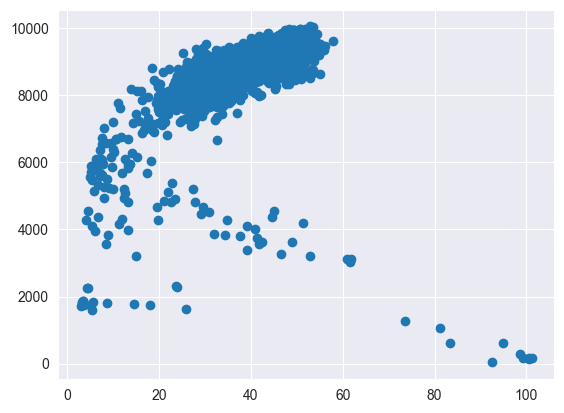

In [77]:
plt.scatter(df['Throttle'], df['RPM'])

In [119]:
df = pd.read_csv('regression_mc_sim.csv')

In [123]:
df

,LapNumber,TrackTemp,RPM,Throttle,Brake,DRS,LapTime,IsPersonalBest,Compound,TyreLife,FreshTyre,TrackStatus,Weight,PitDuration
0,1.0,33.75,9531.494048,46.101190,99,0,91.614,0,6.0,20.0,1,1,838.471950,0.0
1,2.0,33.90,9394.374251,47.080838,93,16,80.619,1,1.0,6.0,0,1,837.135114,0.0
2,3.0,33.90,9429.505952,48.086310,89,24,79.812,1,1.0,7.0,0,0,835.798278,0.0
3,4.0,33.90,9437.838906,47.723404,85,22,79.562,1,1.0,8.0,0,0,834.461442,0.0
4,5.0,33.60,9427.572727,46.830303,92,19,79.400,1,1.0,9.0,0,0,833.124606,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8290,72.0,40.50,9382.875887,50.872340,90,0,80.585,0,4.0,2.0,1,0,807.296677,0.0
8291,73.0,40.80,8971.025559,43.853035,102,0,75.233,1,4.0,3.0,1,0,805.967166,0.0
8292,74.0,40.80,9461.837545,52.931408,85,0,80.473,0,4.0,4.0,1,0,804.637655,0.0
8293,75.0,40.60,9103.670175,47.568421,88,0,74.718,1,4.0,5.0,1,0,803.308144,0.0


In [121]:
grouped = df.groupby('LapNumber')
sim_df = grouped.agg({
        'Throttle': 'mean',
        'Brake': 'mean',
        'FreshTyre': 'mean',
        'DRS': 'mean',
        'PitDuration': 'mean',
        'TyreLife': 'mean',
        'IsPersonalBest': 'median'
    }).reset_index()

In [ ]:
sim_df

# T-Test

In [3]:
df_lap_times = pd.read_csv('regression_w_l_c_with_weight.csv')

In [4]:
df_lap_times

,LapNumber,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Rainfall,Year,DriverNumber,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Weight
0,1.0,25.70,51.0,1015.65,33.75,193.0,0.70,1.0,2018,10,...,Toro Rosso,0 days 00:06:47.319000,NaN,2,10.0,False,NaN,False,False,838.471950
1,2.0,26.00,50.7,1015.60,33.90,181.0,0.60,1.0,2018,10,...,Toro Rosso,0 days 00:08:19.100000,NaN,21,10.0,False,NaN,False,True,837.135114
2,3.0,26.00,50.7,1015.60,33.90,181.0,0.60,1.0,2018,10,...,Toro Rosso,0 days 00:09:39.719000,NaN,1,10.0,False,NaN,False,True,835.798278
3,4.0,26.10,50.0,1015.60,33.90,283.0,1.00,1.0,2018,10,...,Toro Rosso,0 days 00:10:59.531000,NaN,1,10.0,False,NaN,False,True,834.461442
4,5.0,26.60,48.6,1015.60,33.60,232.0,1.65,2.0,2018,10,...,Toro Rosso,0 days 00:12:19.093000,NaN,1,10.0,False,NaN,False,True,833.124606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8306,72.0,21.60,61.5,1018.40,40.50,211.5,0.70,0.0,2024,24,...,Kick Sauber,0 days 03:12:48.585000,NaN,1,16.0,False,NaN,False,True,807.296677
8307,73.0,21.70,61.0,1018.40,40.80,293.0,1.10,0.0,2024,24,...,Kick Sauber,0 days 03:14:09.170000,NaN,1,16.0,False,NaN,False,True,805.967166
8308,74.0,21.70,61.0,1018.40,40.80,214.0,0.70,0.0,2024,24,...,Kick Sauber,0 days 03:15:24.403000,NaN,1,16.0,False,NaN,False,True,804.637655
8309,75.0,21.70,61.0,1018.40,40.60,353.0,0.60,0.0,2024,24,...,Kick Sauber,0 days 03:16:44.876000,NaN,1,16.0,False,NaN,False,True,803.308144


In [6]:
df_lap_times = df_lap_times[['LapNumber', 'LapTime']]

In [8]:
df_lap_times["LapTime"] = pd.to_timedelta(df_lap_times["LapTime"]).dt.total_seconds()

/var/folders/q1/5t02q5xd6yg1fqt4f_zpvklh0000gn/T/ipykernel_94950/3476795349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lap_times["LapTime"] = pd.to_timedelta(df_lap_times["LapTime"]).dt.total_seconds()


In [9]:
df_lap_times

,LapNumber,LapTime
0,1.0,91.614
1,2.0,80.619
2,3.0,79.812
3,4.0,79.562
4,5.0,79.400
...,...,...
8306,72.0,80.585
8307,73.0,75.233
8308,74.0,80.473
8309,75.0,74.718


In [10]:
df_lap_times.LapNumber.value_counts()

LapNumber
1.0     115
3.0     115
5.0     115
4.0     115
6.0     115
       ... 
74.0     88
75.0     88
76.0     86
77.0     74
78.0     46
Name: count, Length: 78, dtype: int64

In [18]:
df_lap_2018 = pd.read_csv('monaco_laps_2018.csv')
df_lap_2019 = pd.read_csv('monaco_laps_2019.csv')
df_lap_2021 = pd.read_csv('monaco_laps_2021.csv')
df_lap_2022 = pd.read_csv('monaco_laps_2022.csv')
df_lap_2023 = pd.read_csv('monaco_laps_2023.csv')
df_lap_2024 = pd.read_csv('monaco_laps_2024.csv')
df_laps = pd.concat([df_lap_2018, df_lap_2019, df_lap_2021, df_lap_2022, df_lap_2023, df_lap_2024])
df_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Year
0,0 days 00:08:19.100000,GAS,10,0 days 00:01:31.614000,1.0,NaN,NaN,NaN,NaN,0 days 00:00:39.994000,...,Toro Rosso,0 days 00:06:47.319000,NaN,2,10.0,False,NaN,False,False,2018
1,0 days 00:09:39.719000,GAS,10,0 days 00:01:20.619000,2.0,1.0,NaN,NaN,0 days 00:00:21.571000,0 days 00:00:37.371000,...,Toro Rosso,0 days 00:08:19.100000,NaN,21,10.0,False,NaN,False,True,2018
2,0 days 00:10:59.531000,GAS,10,0 days 00:01:19.812000,3.0,1.0,NaN,NaN,0 days 00:00:21.179000,0 days 00:00:37.273000,...,Toro Rosso,0 days 00:09:39.719000,NaN,1,10.0,False,NaN,False,True,2018
3,0 days 00:12:19.093000,GAS,10,0 days 00:01:19.562000,4.0,1.0,NaN,NaN,0 days 00:00:21.050000,0 days 00:00:37.245000,...,Toro Rosso,0 days 00:10:59.531000,NaN,1,10.0,False,NaN,False,True,2018
4,0 days 00:13:38.493000,GAS,10,0 days 00:01:19.400000,5.0,1.0,NaN,NaN,0 days 00:00:21.054000,0 days 00:00:37.039000,...,Toro Rosso,0 days 00:12:19.093000,NaN,1,10.0,False,NaN,False,True,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,0 days 03:14:09.170000,ZHO,24,0 days 00:01:20.585000,72.0,3.0,NaN,NaN,0 days 00:00:20.370000,0 days 00:00:36.805000,...,Kick Sauber,0 days 03:12:48.585000,NaN,1,16.0,False,NaN,False,True,2024
1222,0 days 03:15:24.403000,ZHO,24,0 days 00:01:15.233000,73.0,3.0,NaN,NaN,0 days 00:00:19.940000,0 days 00:00:35.135000,...,Kick Sauber,0 days 03:14:09.170000,NaN,1,16.0,False,NaN,False,True,2024
1223,0 days 03:16:44.876000,ZHO,24,0 days 00:01:20.473000,74.0,3.0,NaN,NaN,0 days 00:00:21.051000,0 days 00:00:37.048000,...,Kick Sauber,0 days 03:15:24.403000,NaN,1,16.0,False,NaN,False,True,2024
1224,0 days 03:17:59.594000,ZHO,24,0 days 00:01:14.718000,75.0,3.0,NaN,NaN,0 days 00:00:19.751000,0 days 00:00:34.990000,...,Kick Sauber,0 days 03:16:44.876000,NaN,1,16.0,False,NaN,False,True,2024


In [12]:
df_laps.LapNumber.value_counts()

LapNumber
1.0     115
3.0     115
5.0     115
4.0     115
6.0     115
       ... 
74.0     88
75.0     88
76.0     86
77.0     74
78.0     46
Name: count, Length: 78, dtype: int64

In [19]:
df_laps['LapTime'] = pd.to_timedelta(df_laps['LapTime']).dt.total_seconds()

# Group by Year and DriverNumber, and check if they have all 78 laps
complete_races = df_laps.groupby(['Year', 'DriverNumber'])['LapNumber'].nunique() == 78
complete_drivers = complete_races[complete_races].reset_index()[['Year', 'DriverNumber']]

# Merge with original data to get only complete race data
df_complete = pd.merge(df_laps, complete_drivers, on=['Year', 'DriverNumber'])

# Calculate total race time per driver per year
total_times = df_complete.groupby(['Year', 'DriverNumber'])['LapTime'].sum().reset_index()
total_times = total_times.rename(columns={'LapTime': 'TotalRaceTime'})

# Display results
print(total_times.sort_values(['Year', 'TotalRaceTime']))

    Year  DriverNumber  TotalRaceTime
0   2018             3       6174.807
1   2018             5       6182.143
10  2018            44       6191.820
2   2018             7       6192.934
12  2018            77       6193.629
8   2018            31       6198.474
4   2018            10       6199.138
7   2018            27       6199.646
9   2018            33       6200.124
11  2018            55       6243.820
3   2018             9       6244.671
5   2018            11       6245.268
6   2018            20       6249.630
21  2019            44       6208.437
20  2019            33       6208.974
15  2019             5       6211.039
23  2019            77       6211.599
17  2019            10       6218.383
22  2019            55       6261.891
19  2019            26       6263.011
18  2019            23       6263.637
16  2019             8       6264.471
13  2019             3       6269.331
14  2019             4       6275.238
28  2021            33       5936.820
30  2021    

In [21]:
total_times

,Year,DriverNumber,TotalRaceTime
0,2018,3,6174.807
1,2018,5,6182.143
2,2018,7,6192.934
3,2018,9,6244.671
4,2018,10,6199.138
5,2018,11,6245.268
6,2018,20,6249.630
7,2018,27,6199.646
8,2018,31,6198.474
9,2018,33,6200.124


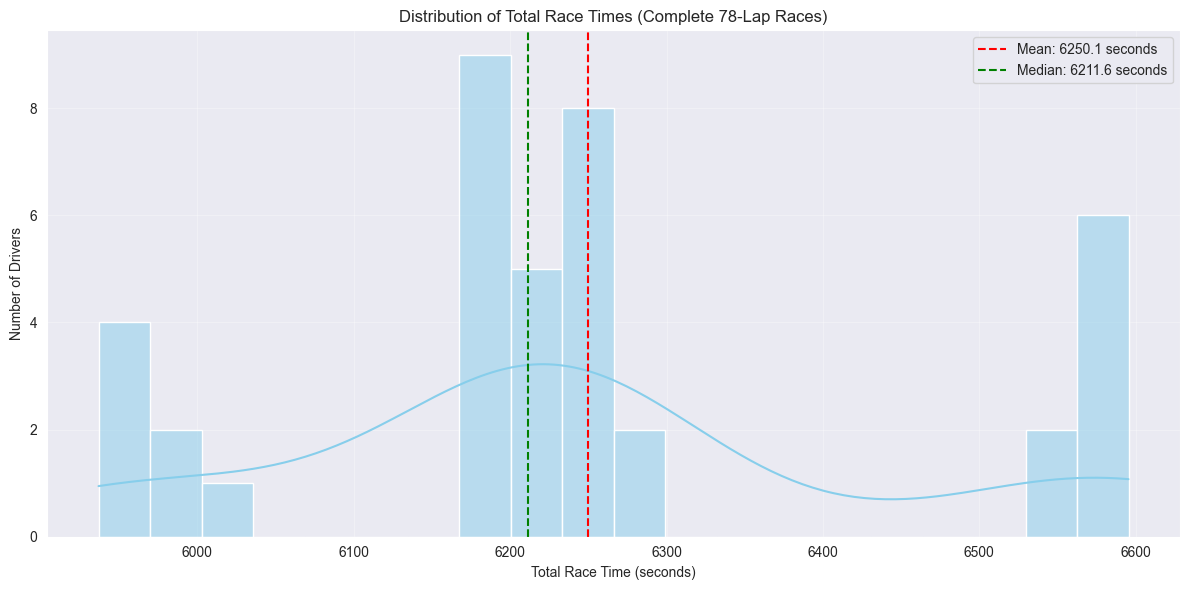

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already calculated total_times as shown previously
# If not, first run the code from previous answer to create total_times dataframe

plt.figure(figsize=(12, 6))

# Convert TotalRaceTime to seconds for better histogram visualization
times_seconds = total_times['TotalRaceTime']

# Create histogram
sns.histplot(times_seconds, bins=20, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Total Race Time (seconds)')
plt.ylabel('Number of Drivers')
plt.title('Distribution of Total Race Times (Complete 78-Lap Races)')

# Add vertical line for mean time
mean_time = times_seconds.mean()
plt.axvline(mean_time, color='red', linestyle='--',
            label=f'Mean: {mean_time:.1f} seconds')

# Add vertical line for median time
median_time = times_seconds.median()
plt.axvline(median_time, color='green', linestyle='--',
            label=f'Median: {median_time:.1f} seconds')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

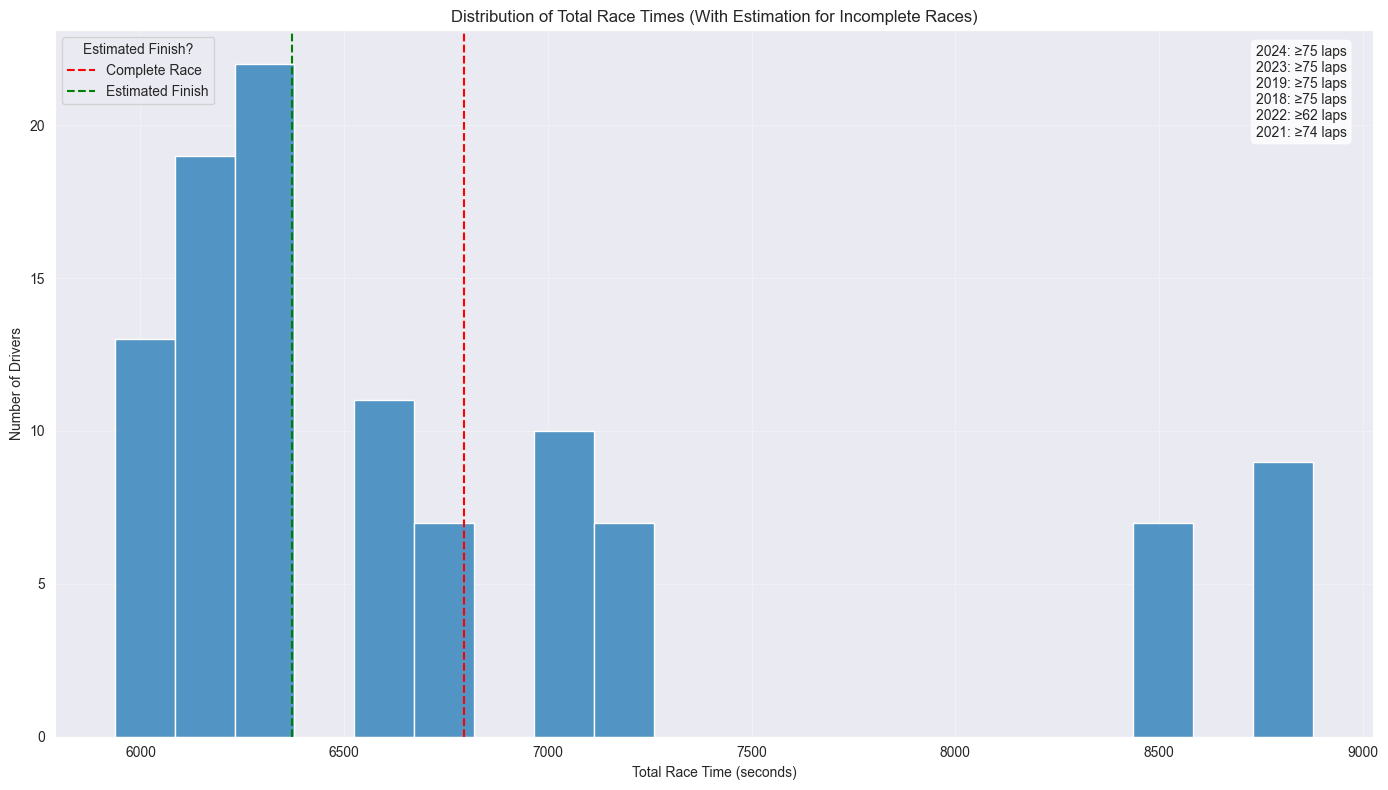

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_laps has columns: LapNumber, DriverNumber, Year, LapTime


# Define minimum lap requirements by year
min_laps_by_year = {
    2024: 75,
    2023: 75,
    2019: 75,
    2018: 75,
    2022: 62,
    2021: 74
}


# Function to calculate total race time with estimation for missing laps
def calculate_total_time(group):
    total_laps = group['LapNumber'].nunique()
    min_laps = min_laps_by_year[group['Year'].iloc[0]]

    if total_laps >= min_laps:
        sum_time = group['LapTime'].sum()
        if total_laps < 78:
            avg_lap = group['LapTime'].mean()
            missing_laps = 78 - total_laps
            estimated_time = sum_time + (avg_lap * missing_laps)
            return estimated_time, True  # True indicates estimated
        return sum_time, False
    return pd.NaT, False  # Not enough laps

# Calculate total times
results = []
for (year, driver), group in df_laps.groupby(['Year', 'DriverNumber']):
    total_time, is_estimated = calculate_total_time(group)
    if not pd.isna(total_time):
        results.append({
            'Year': year,
            'DriverNumber': driver,
            'TotalRaceTime': total_time,
            'Estimated': is_estimated,
            'CompletedLaps': group['LapNumber'].nunique()
        })

total_times = pd.DataFrame(results)

# Convert to seconds for plotting
total_times['TotalRaceTimeSeconds'] = total_times['TotalRaceTime']

# Plotting
plt.figure(figsize=(14, 8))

# Create histogram with different colors for estimated vs complete
#sns.histplot(data=total_times, x='TotalRaceTimeSeconds', hue='Estimated',
#             bins=20, multiple='stack', palette={True: 'orange', False: 'blue'})
sns.histplot(data=total_times, x='TotalRaceTimeSeconds', bins=20)

# Add reference lines
mean_time = total_times['TotalRaceTimeSeconds'].mean()
median_time = total_times['TotalRaceTimeSeconds'].median()
plt.axvline(mean_time, color='red', linestyle='--', label=f'Mean: {mean_time:.1f}s')
plt.axvline(median_time, color='green', linestyle='--', label=f'Median: {median_time:.1f}s')

# Formatting
plt.title('Distribution of Total Race Times (With Estimation for Incomplete Races)')
plt.xlabel('Total Race Time (seconds)')
plt.ylabel('Number of Drivers')
plt.legend(title='Estimated Finish?', labels=['Complete Race', 'Estimated Finish'])
plt.grid(True, alpha=0.3)

# Add annotation with lap requirements
requirements_text = "\n".join([f"{year}: ≥{laps} laps" for year, laps in min_laps_by_year.items()])
plt.annotate(requirements_text, xy=(0.98, 0.98), xycoords='axes fraction',
             ha='right', va='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [31]:
len(total_times)

105

In [32]:
total_times['Year'].value_counts()

Year
2019    19
2021    18
2023    18
2018    17
2022    17
2024    16
Name: count, dtype: int64

In [37]:
total_times.TotalRaceTime.mean()

np.float64(6793.417361974517)

In [38]:
total_times_sim = pd.read_csv('race_times_df.csv')

Mann-Whitney U Test Results:
U statistic: 289017.00
p-value: 0.0760
Effect Size (CLES): 0.449
Interpretation: No significant difference at α=0.05

Descriptive Statistics:
Original data (n=105):
  Mean: 6793.42s, Median: 6370.87s
Simulated data (n=5000):
  Mean: 6329.23s, Median: 6327.59s


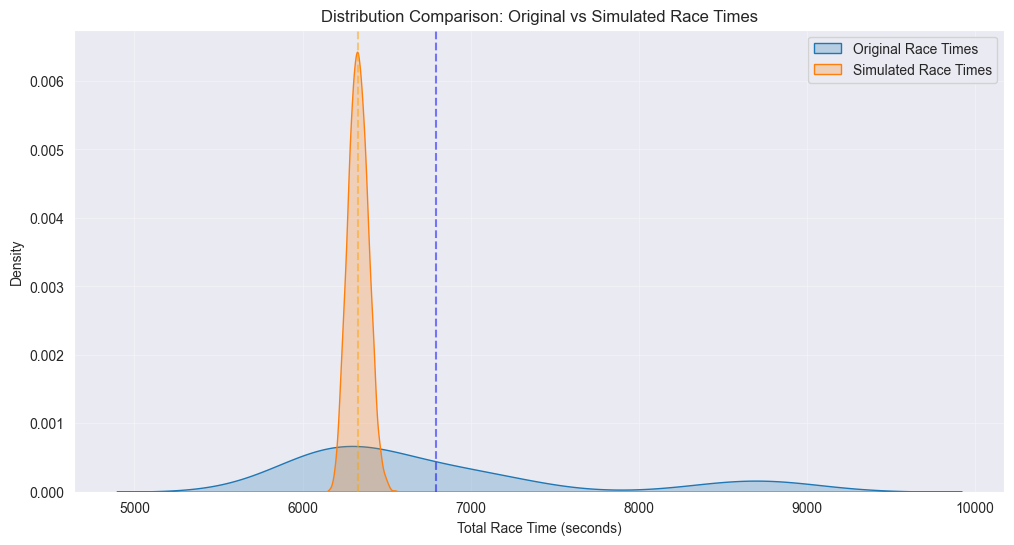

In [39]:
from scipy.stats import mannwhitneyu
import numpy as np

# Ensure we're comparing seconds (numeric values)
sample1 = total_times['TotalRaceTimeSeconds'].values
sample2 = total_times_sim['RaceTime'].values  # Assuming this is already in seconds

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')

# Calculate effect size (common language effect size)
def cles(a, b):
    """Common Language Effect Size"""
    pairs = [(x, y) for x in a for y in b]
    return np.mean([1 if x < y else 0.5 if x == y else 0 for x, y in pairs])

effect_size = cles(sample1, sample2)

# Print results
print(f"Mann-Whitney U Test Results:")
print(f"U statistic: {statistic:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Effect Size (CLES): {effect_size:.3f}")
print(f"Interpretation: {'Significant difference' if p_value < 0.05 else 'No significant difference'} at α=0.05")

# Additional descriptive statistics
print("\nDescriptive Statistics:")
print(f"Original data (n={len(sample1)}):")
print(f"  Mean: {np.mean(sample1):.2f}s, Median: {np.median(sample1):.2f}s")
print(f"Simulated data (n={len(sample2)}):")
print(f"  Mean: {np.mean(sample2):.2f}s, Median: {np.median(sample2):.2f}s")

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(sample1, label='Original Race Times', fill=True)
sns.kdeplot(sample2, label='Simulated Race Times', fill=True)
plt.axvline(np.mean(sample1), color='blue', linestyle='--', alpha=0.5)
plt.axvline(np.mean(sample2), color='orange', linestyle='--', alpha=0.5)
plt.xlabel('Total Race Time (seconds)')
plt.ylabel('Density')
plt.title('Distribution Comparison: Original vs Simulated Race Times')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()